# Pediction using unsupervised ML

### importing necessary packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

### importing dataset

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### shape and info about dataset

In [3]:
print("Shape of dataset : ",iris_df.shape)

Shape of dataset :  (150, 4)


In [4]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


### Finding the optimum number of clusters for k-means classification

In [31]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    print(kmeans)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

KMeans(n_clusters=1, random_state=0)
KMeans(n_clusters=2, random_state=0)
KMeans(n_clusters=3, random_state=0)
KMeans(n_clusters=4, random_state=0)
KMeans(n_clusters=5, random_state=0)
KMeans(n_clusters=6, random_state=0)
KMeans(n_clusters=7, random_state=0)
KMeans(random_state=0)
KMeans(n_clusters=9, random_state=0)
KMeans(n_clusters=10, random_state=0)


In [32]:
wcss

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.47223015873017,
 39.03998724608726,
 34.29971212121213,
 30.06311061745273,
 28.271721728563833,
 26.09432474054042]

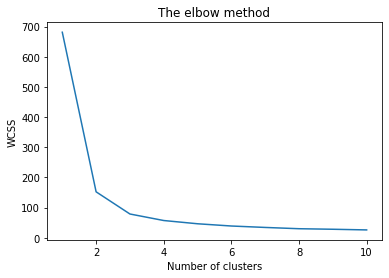

In [33]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Creating KMeans classifier

In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)
y_kmeans= kmeans.predict(x)

In [37]:
from sklearn.metrics import accuracy_score

kmeans2 = KMeans(n_clusters = 2, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
kmeans2.fit(x)
y_pred2= kmeans.predict(x)

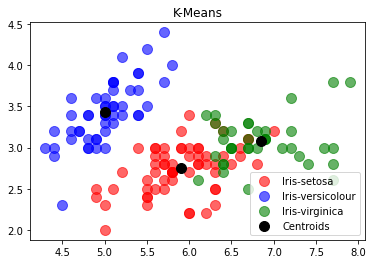

In [38]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa', alpha=0.6)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour',alpha= 0.6)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica', alpha = 0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.title("K-Means")
plt.legend()
plt.show()